In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3359,3623-FQBOX,Male,0,No,No,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,416.4,No
2585,9624-EGDEQ,Female,0,No,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.80,813.3,No
2263,2506-CLAKW,Female,0,No,No,6,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),98.15,567.45,Yes
6886,7234-FECYN,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.35,780.5,Yes
4929,2055-BFOCC,Male,1,Yes,No,63,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.00,5329.55,No


In [9]:
df['MultipleLines'].unique

<bound method Series.unique of 0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object>

# CHECKING COLUMN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df['InternetService'].unique

<bound method Series.unique of 0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object>

In [15]:
df['MultipleLines'].unique

<bound method Series.unique of 0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object>

In [16]:
df['DeviceProtection'].unique

<bound method Series.unique of 0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7043, dtype: object>

# MAKING A BACKUP

In [17]:
BACKUP = df.copy()

# CORRECTING THE DATA  TYPE

In [18]:
df['TotalCharges'].astype("float")

ValueError: could not convert string to float: ' '

In [19]:
df[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# REPLACING BLANK WITH 0

In [20]:
df['TotalCharges'].replace(" ", "0", inplace=True)

In [22]:
df['TotalCharges']= df['TotalCharges'].astype('float')

In [23]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [27]:
a

0        True
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [28]:
a.sum()

np.int64(625)

# CHECKING NULL

In [29]:
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# CO RELATION

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# CHECKING FOR DUPLICATES

In [31]:
df.duplicated().sum()

np.int64(0)

# CHANGING SENIOR CITIZEN

In [32]:
def ZeroTollo(value):
    if value:
        return "Yes"
    else:
        return "No"

In [33]:
df['SeniorCitizen']= df['SeniorCitizen'].apply(ZeroTollo)

In [34]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [44]:
print(ax.containers[0][1])

Rectangle(xy=(0.6, 0), width=0.8, height=1869, angle=0)


findfont: Font family 'Bell NT' not found.
findfont: Font family 'Bell NT' not found.
findfont: Font family 'Bell NT' not found.
findfont: Font family 'Bell NT' not found.
findfont: Font family 'Bell NT' not found.


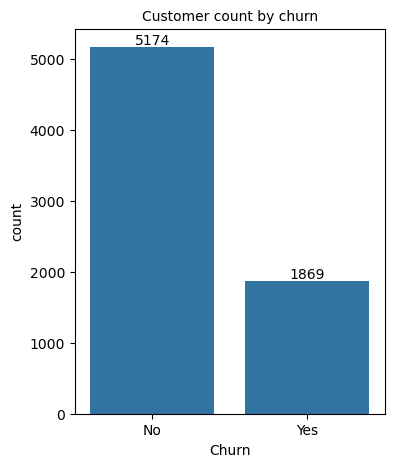

In [50]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Customer count by churn", fontdict={"fontsize":10, 'font': 'Bell NT'})
plt.show()

In [51]:
gb = df.groupby("Churn").agg({"Churn": "count"})

In [52]:
gb

,Churn
Churn,
No,5174
Yes,1869


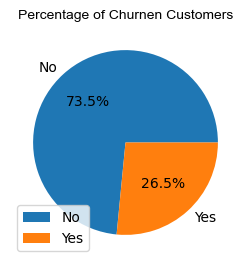

In [60]:
plt.figure(figsize=(3,3))
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.1f%%')
plt.title("Percentage of Churnen Customers", fontdict={"fontsize":10, 'font': 'ARIAL'})
plt.legend()
plt.show()

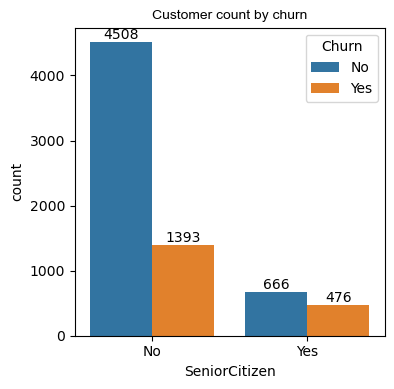

In [64]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer count by churn", fontdict={"fontsize":10, 'font': 'ARIAL'})
plt.show()